In [1]:
## import pandas 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)

In [2]:
df = pd.read_csv('fraud detection.csv')

#### Problem statement - Build a classification model which can detect fraud transations

In [3]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,87.0,19.0,NaN,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,87.0,287.0,NaN,outlook.com,NaN,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,87.0,NaN,NaN,yahoo.com,NaN,2,5,0,0,0,4,0,0,1,0,1,0,25,1,112,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,T,F
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.shape)
# df.info()

(9999, 51)


In [5]:
# df.dist2.unique()

### Assuming that dist2 can be imputed, what imputation approach can be used?
    - Mean imputation (N)
    - Median imputation (N)
    - Mode imputation (N)
    - correlation imputation (Y)
    - standard deviation imputation (N)
    - predictive model imputation / cluster (Y)

### 
    - 1) Missing values 
    - 2) Imbalanced dataset
    - 3) Features description not given (data validation would be difficult)
    - 4) large no. of features
    - 5) Encoding

#### Missing values handling 

In [6]:
missing_vals =df.isnull().sum()
missing_pers = df.isnull().sum()/df.shape[0]*100
m_df = pd.concat([pd.DataFrame(missing_vals, columns = ['m_count']), pd.DataFrame(missing_pers, columns = ['m_percentage'])], axis = 1).sort_values(by = 'm_percentage', ascending = False)
m_df = m_df[m_df.m_percentage > 0]
m_df

,m_count,m_percentage
D7,9776,97.769777
D13,9719,97.199720
dist2,9621,96.219622
D12,9593,95.939594
D14,9549,95.499550
D6,9508,95.089509
D9,8899,88.998900
D8,8899,88.998900
R_emaildomain,8374,83.748375
D11,7723,77.237724


In [7]:
m_df.index

Index(['D7', 'D13', 'dist2', 'D12', 'D14', 'D6', 'D9', 'D8', 'R_emaildomain',
       'D11', 'D5', 'dist1', 'D4', 'M5', 'M2', 'M3', 'M1', 'D15', 'M4', 'D2',
       'D3', 'M6', 'P_emaildomain', 'D10', 'addr2', 'card2', 'card5', 'card6',
       'card4', 'card3'],
      dtype='object')

In [8]:
# df.addr2.unique()

In [9]:
# df.groupby('addr2')['TransactionID'].count()
# # 9079/9999

In [10]:
# print(df.groupby('isFraud')['addr2'].count())
# df.groupby(['isFraud','addr2'])['TransactionID'].count()

In [11]:
# df.groupby('isFraud')['TransactionID'].count()

In [12]:
# df[df.isFraud==1]['addr2'].isnull().sum()

#### key observations
    - ['D7', 'D13', 'dist2', 'D12', 'D14', 'D6', 'D9', 'D8', 'R_emaildomain','D11', 'D5'] => > 70% missing values (drop them)
    - 'dist1' needs to be imputed either through correlation or predictive/cluster modeling approach
    - 'addr2' have 265 records for class '1' where 94 are missing values and remaining as a fixed value of 87 (dropping will be better approach)
    - ['card2', 'card5'] - imputation required
    - ['card6','card4', 'card3'] - drop the records row-wise
    
    - Note:
            - first 6 digits -> bank identification
            - next 9 digits -> unique account number 
            - 1 digit -> check digit for validation on the card (random number)

In [13]:
## dropping records with single missing values
# df.card3.dropna(inplace = True)
# df.card4.dropna(inplace = True)
# df.card6.dropna(inplace = True)

df.drop([df[df.card3.isnull()].index[0],df[df.card4.isnull()].index[0],df[df.card6.isnull()].index[0]], inplace = True)


## type casting 
for each in df[['card3']].columns:
    df[each] = df[each].astype('int')

In [14]:
## imputation of 'card2'
## string comparison
df['complt_card'] =  df.card1.astype('str').astype('object') + df.card3.astype('str').astype('object') + df.card4.astype('str').astype('object') +df.card5.astype('str').astype('object')+ df.card6.astype('str').astype('object')    
df.sort_values(['card1','card3','card4','card6']).tail()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,complt_card
6959,2993959,0,233022,25.0,H,18375,174.0,150,visa,162.0,credit,87.0,NaN,NaN,anonymous.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18375150visa162.0credit
7530,2994530,0,240526,59.0,W,18375,174.0,150,visa,162.0,credit,87.0,NaN,NaN,yahoo.com,NaN,1,1,0,0,0,1,0,0,1,0,1,0,1,1,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,T,T,F,M0,T,T,18375150visa162.0credit
8884,2995884,0,259840,50.0,H,18375,174.0,150,visa,162.0,credit,87.0,NaN,NaN,windstream.net,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18375150visa162.0credit
4125,2991125,0,162427,49.0,W,18387,218.0,150,mastercard,195.0,debit,87.0,2.0,NaN,yahoo.com,NaN,2,2,0,0,0,1,0,0,1,0,1,0,2,2,5,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,T,T,T,M0,T,F,18387150mastercard195.0debit
2645,2989645,0,148067,20.0,W,18390,NaN,150,visa,166.0,debit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,1,1,0,0,1,0,1,0,16,1,130,130.0,7.0,130.0,7.0,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,F,18390150visa166.0debit


In [15]:
# df[(df.card2.isnull()) & (df.complt_card=='2616150.0discover102.0credit')].shape

In [16]:
print('Null count before imputation:',df[(df.card2.isnull())].shape)
for row1 in df[df.card2.isnull()].itertuples():
    for row2 in df[~df.card2.isnull()].itertuples():
        if((row1[-1] == row2[-1]) & (row1[0] != row2[0])):
            df.iloc[row1[0],6] = row2[7]
            break
#             print(row1[0], row2[0],row1[7], row2[7])
#             print(row1[-1],row2[-1])
print('Null count before imputation:',df[(df.card2.isnull())].shape)

Null count before imputation: (118, 52)
Null count before imputation: (88, 52)


In [17]:
# df[(df.card2.isnull()) & (df.complt_card=='2616150.0discover102.0credit')].shape

In [18]:
# df[df.card2.isnull()].sort_values('card1')

In [19]:
## imputation of 'card5'
## string comparison
df['complt_card'] =  df.card1.astype('str').astype('object')+ df.card2.astype('str').astype('object') + df.card3.astype('str').astype('object') + df.card4.astype('str').astype('object') + df.card6.astype('str').astype('object')    
print('Null count before imputation:',df[(df.card5.isnull())].shape)
for row1 in df[df.card2.isnull()].itertuples():
    for row2 in df[~df.card2.isnull()].itertuples():
        if((row1[-1] == row2[-1]) & (row1[0] != row2[0])):
            df.iloc[row1[0],10] = row2[10]
            break
#             print(row1[0], row2[0],row1[7], row2[7])
#             print(row1[-1],row2[-1])
print('Null count after imputation:',df[(df.card5.isnull())].shape)

Null count before imputation: (21, 52)
Null count after imputation: (21, 52)


In [20]:
# df[df.card5.isnull()].sort_values('card1')

In [21]:
 df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2',
       'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
       'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
       'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6',
       'complt_card'],
      dtype='object')

- summary till now
- ['D7', 'D13', 'dist2', 'D12', 'D14', 'D6', 'D9', 'D8', 'R_emaildomain','D11', 'D5'] => drop
    - 'dist1' needs to be imputed either through correlation or predictive/cluster modeling approach
    - 'addr2' => drop

In [22]:
### Missing values handling => "P_emaildomain" , 'dist1', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', C1....C14, D1...D4
## distinct values for object data M1:M6
cols = [ 'M1', 'M2', 'M3', 'M4', 'M5', 'M6']
for each in df[cols].columns:
    print(each, df[each].unique(),'=>',df[each].nunique())

M1 ['T' nan] => 1
M2 ['T' nan 'F'] => 2
M3 ['T' nan 'F'] => 2
M4 ['M2' 'M0' nan 'M1'] => 3
M5 ['F' 'T' nan] => 2
M6 ['T' 'F' nan] => 2


In [23]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,complt_card
0,2987000,0,86400,68.5,W,13926,NaN,150,discover,142.0,credit,87.0,19.0,NaN,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,13926nan150discovercredit
1,2987001,0,86401,29.0,W,2755,404.0,150,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,2755404.0150mastercardcredit
2,2987002,0,86469,59.0,W,4663,490.0,150,visa,166.0,debit,87.0,287.0,NaN,outlook.com,NaN,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F,4663490.0150visadebit
3,2987003,0,86499,50.0,W,18132,567.0,150,mastercard,117.0,debit,87.0,NaN,NaN,yahoo.com,NaN,2,5,0,0,0,4,0,0,1,0,1,0,25,1,112,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,T,F,18132567.0150mastercarddebit
4,2987004,0,86506,50.0,H,4497,514.0,150,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4497514.0150mastercardcredit


In [24]:
### Missing values filling for P_emaildomain => try to see if any pattern exist between P_emaildomain and target variable
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,complt_card
0,2987000,0,86400,68.5,W,13926,NaN,150,discover,142.0,credit,87.0,19.0,NaN,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,13926nan150discovercredit
1,2987001,0,86401,29.0,W,2755,404.0,150,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,2755404.0150mastercardcredit
2,2987002,0,86469,59.0,W,4663,490.0,150,visa,166.0,debit,87.0,287.0,NaN,outlook.com,NaN,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F,4663490.0150visadebit
3,2987003,0,86499,50.0,W,18132,567.0,150,mastercard,117.0,debit,87.0,NaN,NaN,yahoo.com,NaN,2,5,0,0,0,4,0,0,1,0,1,0,25,1,112,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,T,F,18132567.0150mastercarddebit
4,2987004,0,86506,50.0,H,4497,514.0,150,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4497514.0150mastercardcredit


In [25]:
for each in ['D'+str(x) for x in [4,15,2,3,10]]:
    print(each, df[each].unique()[1:10],'=>',df[each].nunique())
    
# open questions: 1) are these data representing discrete or continuos numbers?
# Relation with the target can be seen to estimate approximation of missing values

D4 [  0.  94. 318. 107.  45.  35. 358.  65.  24.] => 484
D15 [315. 111.  nan 318. 107.  45.  62. 109.  65.] => 507
D2 [112.  61.   1.  72.  46.  62. 485.  66. 169.] => 493
D3 [nan  0. 30. 11. 10.  2.  3. 35. 56.] => 290
D10 [  0.  84.  nan  40. 107.  45. 465.  50. 485.] => 501


-122.0 657.0


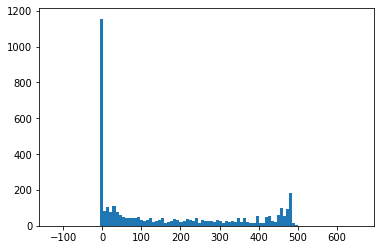

In [26]:
df.D4.isnull().sum()
print(np.min(df.D4), np.max(df.D4))

plt.hist(df.D4, bins = 100)
plt.show()

In [27]:
# df.info()

In [28]:
df.D4  = df.D4.fillna(9999999)

In [30]:
# df['D4_B'] = df[].D4.apply(lambda x: '<=0' if x <= 0 else
#                          ('[100)' if ((x > 0) & (x<= 100)) else 
#                           ('[200)' if ((x >100) & (x<= 200)) else 
#                            ('[300)' if ((x > 200) & (x<= 300))  else 
#                             ('[400)' if ((x >300) & (x<= 400)) else 
#                              ('[500)' if ((x >400) & ( x<= 500)) else '[600' )))) ))

# df[df['isFraud'] == 0].groupby(['D4_B'])['isFraud'].count().reset_index() # noe -fraud

In [ ]:
# df[df['isFraud'] == 1].groupby(['D4_B'])['isFraud'].count().reset_index()

In [31]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,complt_card
0,2987000,0,86400,68.5,W,13926,NaN,150,discover,142.0,credit,87.0,19.0,NaN,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,NaN,13.0,9999999.0,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,13926nan150discovercredit
1,2987001,0,86401,29.0,W,2755,404.0,150,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,2755404.0150mastercardcredit
2,2987002,0,86469,59.0,W,4663,490.0,150,visa,166.0,debit,87.0,287.0,NaN,outlook.com,NaN,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F,4663490.0150visadebit
3,2987003,0,86499,50.0,W,18132,567.0,150,mastercard,117.0,debit,87.0,NaN,NaN,yahoo.com,NaN,2,5,0,0,0,4,0,0,1,0,1,0,25,1,112,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,T,F,18132567.0150mastercarddebit
4,2987004,0,86506,50.0,H,4497,514.0,150,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,NaN,NaN,9999999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4497514.0150mastercardcredit


In [32]:
df.P_emaildomain.unique()

array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es'], dtype=object)

#### Hypothesis: does the card type (card6) has any relation with fraud transation?

In [33]:
df.pivot_table(values = 'TransactionID',index = 'isFraud', columns = 'card6' , aggfunc='count')

card6,credit,debit
isFraud,,
0,1958,7775
1,150,115


In [34]:
# create frequency table
freq_table = pd.crosstab(df['card6'],
            df['isFraud'],
            margins = False)
freq_table

isFraud,0,1
card6,,
credit,1958,150
debit,7775,115


In [35]:
stat, p, dof, expected = chi2_contingency(freq_table)
# select significance value
alpha = 0.05
# Determine whether to reject or keep your null hypothesis
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')

significance=0.050, p=0.000
Variables are associated (reject H0)


In [36]:
# 1) Encoding - which encoding to use?
print(df.pivot_table(values = 'TransactionID',index = 'isFraud', columns = 'ProductCD' , aggfunc='count'))


# 2) If there is any assoication of the trarget variable with productCD?
# create frequency table
freq_table = pd.crosstab(df['ProductCD'],
            df['isFraud'],
            margins = False)
# freq_table

stat, p, dof, expected = chi2_contingency(freq_table)
# select significance value
alpha = 0.05
# Determine whether to reject or keep your null hypothesis
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')

ProductCD    C    H    R    S     W
isFraud                            
0          812  858  288  199  7576
1           94   12   17   10   132
significance=0.050, p=0.000
Variables are associated (reject H0)


Text(0.5, 1.0, 'Frequency of ProductCD by Target')

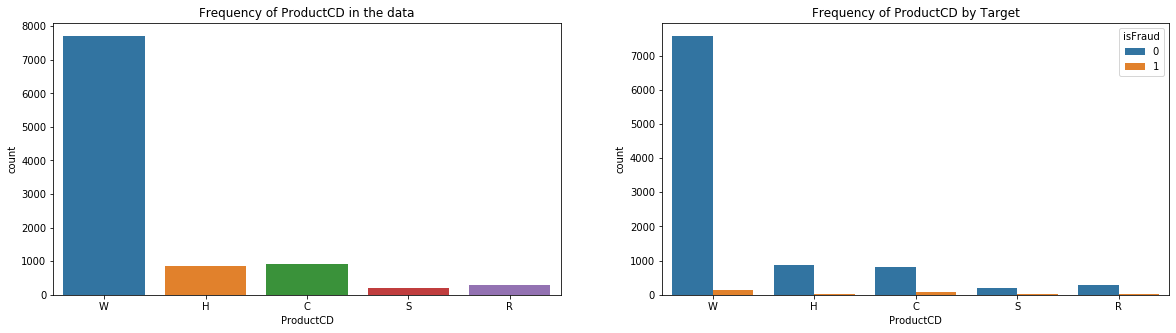

In [37]:
fig, ax = plt.subplots(1,2, figsize = (20,5))
sns.countplot(x = 'ProductCD', data = df, ax = ax[0]).set_title('Frequency of ProductCD in the data')
sns.countplot(x = 'ProductCD', hue= 'isFraud', data = df, ax = ax[1]).set_title('Frequency of ProductCD by Target')

In [38]:
df.ProductCD.unique()

# 'w' -> 1, 
# 'W' -> 100  (95 % -> 1 and 4 % 0) (2)
# 'H' -> 100  (90% -> 1 and 5% -> 0)  (1)
# (c,s,r) -> 0

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

In [39]:
# 'gender' -> M, F (0,1) / (2,3)
# 'rank' -> F, S,T, F, FI

In [40]:
# sns.countplot(x = 'ProductCD', hue= 'card6', data = df).set_title('Frequency of ProductCD by Target')

#### Target analysis

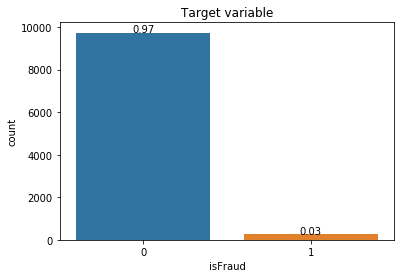

In [41]:
ax = sns.countplot(x="isFraud", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center") 
ax.set_title('Target variable')
plt.show()

In [42]:
### Example - imbalanced dataset 
# ---  having an imbalanced class distribution cause any issue?

### How to handle imbalanced class problem ?
 # sampling -> over-sampling and under-sampling 
      # oversampling -> increase examples of the minority class
      # undersampling -> decrease examples of the majority class  

# Example
## 100 records where 4 records -> 1 (minority class) and 96 records -> 0 (majority class)

## undersampling => new dataset => 8 records where 4 (minority class) + 4 (majority class) 
## oversampling => new dataset => 2*96 records where 96 (minority class) + 96 (majority class) 

# SMOTE, Random Undersampling, Random Oversampling 
# imblearn (package)